# Enunciado

In [1134]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

## Preparación de datos (1.0pt)

Explore el archivo `covid19_confirmados.csv` y configure la función `pd.read_csv` para importarlo como un `DataFrame`

1. Utilice el nombre de país como índice
1. Elimine las columnas `Lat` y `Long`
1. Use TimeStamps para las columnas asociadas a fechas
1. Reduzca la columna `Province/State`. El DataFrame resultante debe tener los totales a nivel país

In [1135]:
df = pd.read_csv("data/covid19_confirmados.csv",index_col='Country/Region', dayfirst=False)
df2 = df.drop(['Lat','Long'], axis=1)
df2 = df2.groupby(['Country/Region']).sum()

# Timestamps para las columnas
columns = df2.columns
newCols = []
for col in columns:
    ts = pd.to_datetime(col) #.date()
    newCols.append(ts)
df2.columns = newCols
display(df2.columns)
# display(df)
display(df2)

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04',
               '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08',
               '2022-04-09', '2022-04-10'],
              dtype='datetime64[ns]', length=810, freq=None)

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,177782,177803,177827,177897,177932,177974,177974,177974,177974,177974
Albania,0,0,0,0,0,0,0,0,0,0,...,273759,273823,273870,273913,274000,274055,274108,274136,274191,274219
Algeria,0,0,0,0,0,0,0,0,0,0,...,265679,265684,265691,265694,265699,265705,265707,265714,265720,265724
Andorra,0,0,0,0,0,0,0,0,0,0,...,40024,40024,40024,40024,40024,40024,40328,40328,40328,40328
Angola,0,0,0,0,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99194,99194,99194,99194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,655750,655750,655750,656287,656287,656287,656287,656287,656287,656287
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,0,0,0,0,0,0,0,0,0,0,...,11806,11806,11806,11808,11812,11812,11812,11812,11813,11813


Explore el archivo `population_by_country_2020.csv` y configure la función `read_csv` de pandas para importarlo como un `DataFrame`. Utilice el nombre de país como índice principal. 

Nota: Algunos siglas o nombres podrían no calzar con el `DataFrame` anterior, explore y corrija programaticamente dichos errores

In [1136]:
df3 = pd.read_csv("data/poblacion_mundial2020.csv", index_col='Country (or dependency)')
df3 = df3.sort_values('Country (or dependency)')
df3.index.name = "Country/Region"
df3 = df3.drop(['Yearly Change','Net Change','Density (P/Km²)','Land Area (Km²)','Migrants (net)','Fert. Rate','Med. Age','Urban Pop %','World Share'], axis=1)
display(df3)

#dfExluido = dfFiltrado


,Population (2020)
Country/Region,
Afghanistan,39074280
Albania,2877239
Algeria,43984569
American Samoa,55169
Andorra,77287
...,...
Wallis & Futuna,11203
Western Sahara,599769
Yemen,29935468


Realice un `merge` de los `DataFrame` anteriores. El objetivo es asignar un valor de `Population` a cada elemento del primer `DataFrame`. Indique las filas donde no se puede realizar el `merge` y luego descártelas de su `DataFrame` final

In [1137]:
#DataFrame con la Poblacion + C19Confirmados
dfAll = pd.merge(df2, df3, left_index=True, right_index=True, how="outer")
# Dataframe sin las filas que tienen valores de NaN
dfConf = pd.merge(df2, df3, left_index=True, right_index=True)
# Dataframe con solo las filas que no se pueden realizar, que tienen valores NaN
dfNaN = dfAll.merge(dfConf, left_index=True, right_index=True, how="left", indicator=True)
dfNaN = dfNaN[dfNaN["_merge"] == "left_only"]
display(dfNaN)
display(dfConf)

,2020-01-22 00:00:00_x,2020-01-23 00:00:00_x,2020-01-24 00:00:00_x,2020-01-25 00:00:00_x,2020-01-26 00:00:00_x,2020-01-27 00:00:00_x,2020-01-28 00:00:00_x,2020-01-29 00:00:00_x,2020-01-30 00:00:00_x,2020-01-31 00:00:00_x,...,2022-04-03 00:00:00_y,2022-04-04 00:00:00_y,2022-04-05 00:00:00_y,2022-04-06 00:00:00_y,2022-04-07 00:00:00_y,2022-04-08 00:00:00_y,2022-04-09 00:00:00_y,2022-04-10 00:00:00_y,Population (2020)_y,_merge
Country/Region,,,,,,,,,,,,,,,,,,,,,
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
Antarctica,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
Bermuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
Wallis & Futuna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
West Bank and Gaza,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,2022-04-02 00:00:00,2022-04-03 00:00:00,2022-04-04 00:00:00,2022-04-05 00:00:00,2022-04-06 00:00:00,2022-04-07 00:00:00,2022-04-08 00:00:00,2022-04-09 00:00:00,2022-04-10 00:00:00,Population (2020)
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,177803,177827,177897,177932,177974,177974,177974,177974,177974,39074280
Albania,0,0,0,0,0,0,0,0,0,0,...,273823,273870,273913,274000,274055,274108,274136,274191,274219,2877239
Algeria,0,0,0,0,0,0,0,0,0,0,...,265684,265691,265694,265699,265705,265707,265714,265720,265724,43984569
Andorra,0,0,0,0,0,0,0,0,0,0,...,40024,40024,40024,40024,40024,40328,40328,40328,40328,77287
Angola,0,0,0,0,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99194,99194,99194,33032075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,0,0,0,0,0,...,520708,520843,520905,521030,521105,521186,521325,521373,521471,28421581
Vietnam,0,2,2,2,2,2,2,2,2,2,...,9716282,9818328,9867045,9922040,9980464,10070692,10135789,10169929,10198236,97490013
Yemen,0,0,0,0,0,0,0,0,0,0,...,11806,11806,11808,11812,11812,11812,11812,11813,11813,29935468


Escriba funciones para el procedimiento anterior y aplíquelas en los archivos `covid19_recuperados.csv` y `covid19_muertes.csv` 

In [1138]:
def confDF(dFrame, dFPaises):
    d = dFrame.drop(['Lat','Long'], axis=1)
    d = d.groupby(['Country/Region']).sum()
    return pd.merge(d,dFPaises, left_index=True, right_index=True)

#DataFrame con la Poblacion + C19Recuperados
dfRec = pd.read_csv("data/covid19_recuperados.csv", index_col='Country/Region')
dfRec = confDF(dfRec,df3)
#DataFrame con la Poblacion + C19Muertes
dfMuert = pd.read_csv("data/covid19_muertes.csv", index_col='Country/Region')
dfMuert = confDF(dfMuert,df3)
display(dfRec)
display(dfMuert)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/2/22,4/3/22,4/4/22,4/5/22,4/6/22,4/7/22,4/8/22,4/9/22,4/10/22,Population (2020)
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,39074280
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2877239
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,43984569
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,77287
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33032075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28421581
Vietnam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,97490013
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29935468


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/2/22,4/3/22,4/4/22,4/5/22,4/6/22,4/7/22,4/8/22,4/9/22,4/10/22,Population (2020)
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,7671,7671,7671,7671,7671,7671,7671,7671,7671,39074280
Albania,0,0,0,0,0,0,0,0,0,0,...,3492,3492,3492,3492,3492,3492,3492,3492,3493,2877239
Algeria,0,0,0,0,0,0,0,0,0,0,...,6874,6874,6874,6874,6874,6874,6874,6874,6874,43984569
Andorra,0,0,0,0,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,77287
Angola,0,0,0,0,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,33032075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,0,0,0,0,0,...,5685,5686,5687,5688,5689,5691,5692,5693,5695,28421581
Vietnam,0,0,0,0,0,0,0,0,0,0,...,42563,42600,42642,42681,42712,42733,42768,42794,42813,97490013
Yemen,0,0,0,0,0,0,0,0,0,0,...,2143,2143,2144,2144,2144,2145,2146,2147,2147,29935468


## Análisis global (1.5pt)

Escriba una función que reciba una fecha y que retorne las siguientes series 

1. Tasa de incidencia: Casos confirmados por 100.000 dividido población total
1. Tasa de recuperación: Casos recuperados por 100.000 dividido población total
1. Tasa de mortalidad: Casos decesos por 100.000 dividido población total

Ahora, considerando los siguientes tres puntos temporales

- 22 de Enero de 2020
- 22 de Enero de 2021
- 22 de Enero de 2022

Muestre los nombres y los valores de los 3 países con

1. La mayor y menor tasa de incidencia, respectivamente
1. La mayor y menor tasa de recuperación, respectivamente
1. La mayor y menor tasa de mortalidad, respectivamente

Muestre también la posición de Chile en el ranking

In [1139]:
#Tasa de incidencia, recuperacion y mortalidad
def tasas(fecha):
  fechaTimeStamp = pd.to_datetime(fecha)
  tasInc = dfConf[fechaTimeStamp]*100000/dfConf['Population (2020)']
  tasInc = tasInc.rename('Tasa de Incidencia')
  tasRec = dfRec[fecha]*100000/dfRec['Population (2020)']
  tasRec = tasRec.rename('Tasa de recuperación')
  tasMort = dfMuert[fecha]*100000/dfMuert['Population (2020)']
  tasMort = tasMort.rename('Tasa de mortalidad')
  return tasInc, tasRec, tasMort

# def findLargest(series):
#   largest = series[0]
#   for i in series:
#     if (i > largest): largest = i
#   return largest

# def findSmallest(series):
#   smallest = series[0]
#   for i in series:
#     if (i < smallest): smallest = i
#   return smallest

# Retorna un tuple con index 0 == incidencia, 1 == recuperación y 2 == mortalidad
tasas = tasas('4/2/22')
# display(tasas[0], tasas[1], tasas[2])
display("La mayor tasa de incidencia", tasas[0].nlargest(1))
display("La mayor tasa de recuperación", tasas[1].nlargest(1))
display("La mayor tasa de mortalidad", tasas[2].nlargest(1))
display("La menor tasa de incidencia", tasas[0].nsmallest(1))
display("La menor tasa de recuperación", tasas[1].nsmallest(1))
display("La menor tasa de mortalidad", tasas[2].nsmallest(1))

display("Chile tasa de incidencia: ", tasas[0].at["Chile"])
display("Chile tasa de recuperación: ", tasas[1].at["Chile"])
display("Chile tasa de mortalidad: ", tasas[2].at["Chile"])


'La mayor tasa de incidencia'

Country/Region
Denmark    53681.368168
Name: Tasa de Incidencia, dtype: float64

'La mayor tasa de recuperación'

Country/Region
Afghanistan    0.0
Name: Tasa de recuperación, dtype: float64

'La mayor tasa de mortalidad'

Country/Region
Peru    642.352934
Name: Tasa de mortalidad, dtype: float64

'La menor tasa de incidencia'

Country/Region
Micronesia    0.867822
Name: Tasa de Incidencia, dtype: float64

'La menor tasa de recuperación'

Country/Region
Afghanistan    0.0
Name: Tasa de recuperación, dtype: float64

'La menor tasa de mortalidad'

Country/Region
Holy See    0.0
Name: Tasa de mortalidad, dtype: float64

'Chile tasa de incidencia: '

18188.805671362767

'Chile tasa de recuperación: '

0.0

'Chile tasa de mortalidad: '

296.10953059621755

Ahora realice las siguientes gráficas de nube de punto

- Tasa de incidencia Enero 2020 versus Tasa de incidencia Enero 2021
- Tasa de incidencia Enero 2021 versus Tasa de incidencia Enero 2022
- Tasa de mortalidad Enero 2020 versus Tasa de incidencia Enero 2021
- Tasa de mortalidad Enero 2021 versus Tasa de incidencia Enero 2022

En cada una:

- Utilice color para demarcar el continente de cada pais
- Realice una anotación con el código del pais cercano a su punto (https://country-code.cl/es/)
- Utilice un tamaño relativamente más grande para Chile
- Considere las buenas prácticas vistas en clases

Text(0, 0.5, 'Tasa de incidencia 1/1/22 - 1/31/2')

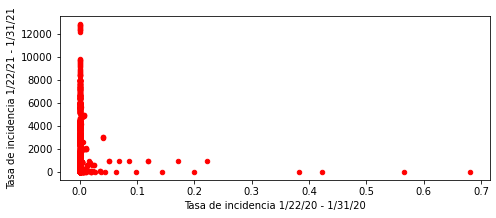

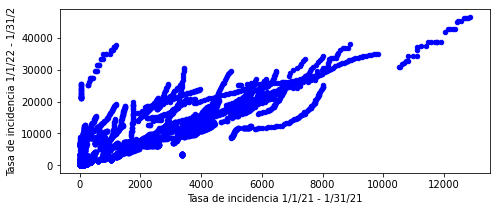

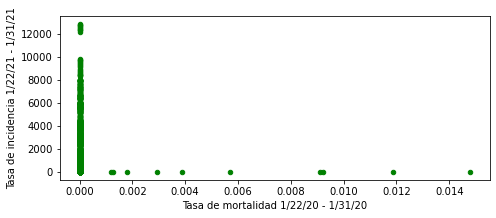

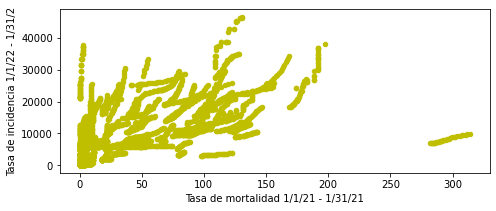

In [1140]:
#Tomamos solamente la semana entre el 22 de enero y el 31 de enero porque en el 2020 no está el mes completo.

fecha = '1/22/20'                                                       #Tasa de insidencia Enero 2020 vs Tasa de insidencia Enero 2021
fecha2 = '1/31/20'
fechaTimeStamp = pd.to_datetime(fecha)
fechaTimeStamp2 = pd.to_datetime(fecha2)

x = dfConf.loc[:, fechaTimeStamp : fechaTimeStamp2] * 100000
x = x.div(dfConf.loc[:,'Population (2020)'],axis = 0)


fecha3 = '1/22/21'
fecha4 = '1/31/21'
fechaTimeStamp3 = pd.to_datetime(fecha3)
fechaTimeStamp4 = pd.to_datetime(fecha4)

y = dfConf.loc[:, fechaTimeStamp3 : fechaTimeStamp4] * 100000
y = y.div(dfConf.loc[:,'Population (2020)'],axis = 0)


fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)

ax.scatter(x, # Posición horizontal de los puntos
           y, # Posición vertical de los puntos
           marker='o', # forma de los puntos
           s=20, # Tamaño de los puntos
           c='r', # Color de los puntos
           alpha=1.) # Opacidad de los puntos

ax.set_xlabel('Tasa de incidencia 1/22/20 - 1/31/20')
ax.set_ylabel('Tasa de incidencia 1/22/21 - 1/31/21')

# -------------------------------------------------------------------------------------------------------- # 

fecha5 = '1/1/21'                                                       #Tasa de insidencia Enero 2021 vs Tasa de insidencia Enero 2022
fecha6 = '1/31/21'
fechaTimeStamp5 = pd.to_datetime(fecha5)
fechaTimeStamp6 = pd.to_datetime(fecha6)

tx = dfConf.loc[:, fechaTimeStamp5 : fechaTimeStamp6] * 100000
tx = tx.div(dfConf.loc[:,'Population (2020)'],axis = 0)


fecha7 = '1/1/22'
fecha8 = '1/31/22'
fechaTimeStamp7 = pd.to_datetime(fecha7)
fechaTimeStamp8 = pd.to_datetime(fecha8)

ty = dfConf.loc[:, fechaTimeStamp7 : fechaTimeStamp8] * 100000
ty = ty.div(dfConf.loc[:,'Population (2020)'],axis = 0)


fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)

ax.scatter(tx, # Posición horizontal de los puntos
           ty, # Posición vertical de los puntos
           marker='o', # forma de los puntos
           s=20, # Tamaño de los puntos
           c='b', # Color de los puntos
           alpha=1.) # Opacidad de los puntos

ax.set_xlabel('Tasa de incidencia 1/1/21 - 1/31/21')
ax.set_ylabel('Tasa de incidencia 1/1/22 - 1/31/2')


# -------------------------------------------------------------------------------------------------------- #

fecha = '1/22/20'                                                          #Tasa de mortalidad Enero 2020 vs Tasa de insidencia Enero 2021                         
fecha2 = '1/31/20'                                                                          

mx = dfMuert.loc[:, fecha : fecha2] * 100000
mx = mx.div(dfMuert.loc[:,'Population (2020)'],axis = 0)


fecha3 = '1/22/21'
fecha4 = '1/31/21'
fechaTimeStamp3 = pd.to_datetime(fecha3)
fechaTimeStamp4 = pd.to_datetime(fecha4)

iy = dfConf.loc[:, fechaTimeStamp3 : fechaTimeStamp4] * 100000
iy = iy.div(dfConf.loc[:,'Population (2020)'],axis = 0)


fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)

ax.scatter(mx, # Posición horizontal de los puntos
           iy, # Posición vertical de los puntos
           marker='o', # forma de los puntos
           s=20, # Tamaño de los puntos
           c='g', # Color de los puntos
           alpha=1.) # Opacidad de los puntos

ax.set_xlabel('Tasa de mortalidad 1/22/20 - 1/31/20')
ax.set_ylabel('Tasa de incidencia 1/22/21 - 1/31/21')


# -------------------------------------------------------------------------------------------------------- #

fecha5 = '1/1/21'                                                           #Tasa de mortalidad Enero 2021 vs Tasa de insidencia Enero 2022
fecha6 = '1/31/21'


mux = dfMuert.loc[:, fecha5 : fecha6] * 100000
mux = mux.div(dfMuert.loc[:,'Population (2020)'],axis = 0)


fecha7 = '1/1/22'
fecha8 = '1/31/22'
fechaTimeStamp7 = pd.to_datetime(fecha7)
fechaTimeStamp8 = pd.to_datetime(fecha8)

iny = dfConf.loc[:, fechaTimeStamp7 : fechaTimeStamp8] * 100000
iny = iny.div(dfConf.loc[:,'Population (2020)'],axis = 0)


fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)

ax.scatter(mux, # Posición horizontal de los puntos
           iny, # Posición vertical de los puntos
           marker='o', # forma de los puntos
           s=20, # Tamaño de los puntos
           c='y', # Color de los puntos
           alpha=1.) # Opacidad de los puntos

ax.set_xlabel('Tasa de mortalidad 1/1/21 - 1/31/21')
ax.set_ylabel('Tasa de incidencia 1/1/22 - 1/31/2')




#plt.figure(figsize=(10,7))
#plt.plot(x,y,'o',markersize=2)
#plt.show()

En base a los rankings y gráficas de nube de punto analice y discuta sobre el caso de Chile ¿A qué países del (a) mundo, (b) América Latina y (c) la [OCDE](https://es.wikipedia.org/wiki/Organizaci%C3%B3n_para_la_Cooperaci%C3%B3n_y_el_Desarrollo_Econ%C3%B3micos) se parece más? 

## Análisis comparativo (1.5pt)

Construya una interfaz gráfica usando `ipywidgets` y `matplotlib` que permita realizar comparaciones entre las series de tiempo de COVID-19 de dos países seleccionados arbitrariamente. A modo de simplificación considere sólo los países de la [OCDE](https://es.wikipedia.org/wiki/Organizaci%C3%B3n_para_la_Cooperaci%C3%B3n_y_el_Desarrollo_Econ%C3%B3micos). 

Requerimientos:

1. La interfaz debe incluir controles para escoger dos países a partir de una lista
1. La interfaz debe incluir tres [tabs](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#Tabs), el primero debe mostrar las series de tiempo de ambos países de los casos confirmados, el segundo la de recuperados y el tercero la de los decesos, respectivamente. Use una leyenda para indicar el nombre de los países.
1. La interfaz debe tener un control que permita escoger entre casos acumulados y casos nuevos. Hint: Para los casos nuevos pueden revisar la función [`diff`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.diff.html)
1. La interfaz debe tener un control que permita escoger entre valores absolutos y valores relativos (tasas por 100.000 habitantes)
1. La interfaz debe tener un control que permita escoger entre valores diarios y valores semanales. Para esto último se recomienda usar `groupby` con una [frecuencia lunes a lunes](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets)
    



In [1141]:
import numpy as np
#from ipywidgets import interact
import ipywidgets as widgets

def f(Pais1,Pais2): 
    Pais1,Pais2

def ui(df):
    out = widgets.Output()
    with out:
        display(df)
    return (out)

def on_Change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        print("valor cambiado")
#widgets.interact(f, Pais1=dfConf.index, Pais2=dfConf.index)

opt = widgets.Dropdown(
    value=None,
    placeholder = 'Eliga un pais',
    options=dfConf.index.tolist(),
    description = 'Pais:',
    ensure_option=True,
    disabled=False
)

opt.observe(on_Change)
display(opt)


children = [ui(dfConf),widgets.Label(value='Datos 2'),widgets.Label(value='Datos 3')]
tab = widgets.Tab()
tab.children = children

tab.set_title(0,'Casos Confirmados')
tab.set_title(1,'Casos recuperados')
tab.set_title(2,'Decesos')
tab
#print(dfConf.index.tolist())


Dropdown(description='Pais:', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and …

## Dashboard interactivo (1.0pt)

Implemente un *dashboard web* interactivo a partir de la interfaz desarrollada en el punto anterior utilizando la librería [voila](https://github.com/voila-dashboards/voila). Sirva su interfaz en la nube, para esto puede considerar los servicios gratuitos [binder](https://mybinder.org/) o [heroku](https://www.heroku.com/free). Revise la documentación de voila [con respecto a *deployment* en la nube](https://voila.readthedocs.io/en/stable/deploy.html) y este repositorio con [un ejemplo en base a heroku](https://github.com/voila-dashboards/voila-heroku). 

Escriba el link de su dashboard web a continuación:

## Discusión final (1.0pt)

En base a su interfaz:   

1. Describa en detalle la situación de Chile con respecto a la evolución temporal de las series de tiempo. En particular destaque patrones y comportamientos que considere relevantes y compare lo que observa en las distintas series de tiempo. Considerando la evolución a nivel de semana, conteste ¿En qué fechas ocurre un aumento o disminución notoria de los casos? ¿En qué fechas hay máximos y mínimos?
1. Considerando métricas que sean relativas compare el caso de Chile contra cinco países de la OCDE seleccionados por ustedes. Destaque semejanzas y diferencias considerando las cantidades y los posibles desfases temporales existentes.